## Solving OpenAI Gym Taxi-v2 problem

    "There are 4 locations (labelled by different letters), and our job
    is to pick up the passenger at one location and drop him off at
    another. We receive +20 points for a successful drop-off and lose 1
    point for every time-step it takes. There is also a 10 point penalty
    for illegal pick-up and drop-off actions.” 

We will have an agent learn Gym’s taxi-environment with the Q-learning algorithm. 

Game consist of a 5×5 matrix containing our taxi and four different cabstands labeled with letters.  Also, there are some walls in the environment that our taxi can’t pass. The task of the game is to pick up passengers at one of the cabstands and carry them to their destinations.

To do that, our agent has six possible actions to choose from. He can go north, south, east or west and he can try to pick up or drop off a passenger. This is called the action space of our taxi. Besides the action space we also have to define the state space. As we have 5*5 taxi locations, 5 different passenger locations (because we have to include the passenger being in our taxi) and 4 different destinations, the total number of states is 5*5*5*4 = 500.

Performing actions rewards the agent with points. He receives 20 points for a successful drop-off and loses 1 point for every time-step it takes. The latter results in our agent trying to solve the task fairly quick and prevents him from wandering around. There is also a -10 point penalty for illegal pick-up and drop-off actions and -1 penalty for driving against a wall.

## Q-learning agent

A good way to approach a solution is using the simple Q-learning algorithm, which gives our agent a memory in form of a Q-table of size states x actions we store a value for each state-action combination. hose values estimate the reward we get by taking that action and are called Q-values. Thus Q-values represent the “quality” of an action taken from that state. Higher Q-values imply better chances of getting greater rewards. 

**Source:**
https://www.novatec-gmbh.de/en/blog/introduction-to-q-learning/

$\bf{More\;Reinforcement\;Techniques}$:
- MDPs and Bellman Equations
- Dynamic Programming: Model-Based RL, Policy Iteration and Value Iteration
- Deep Q Learning
- Policy Gradient Methods
- SARSA

In [1]:
import gym
from time import sleep

import numpy as np
import random

from IPython.display import clear_output

In [2]:
# Init Taxi-V2 Env
env = gym.make("Taxi-v2").env

In [3]:
env.reset()
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [5]:
env.s = 328

In [7]:
# Setting the number of iterations, penalties and reward to zero,
epochs = 0
penalties, reward = 0, 0

frames = []

done = False

In [8]:
while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1

    # Put each rendered frame into the dictionary for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
    }
    )

    epochs += 1

In [9]:
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 246
Penalties incurred: 86


In [10]:
len(frames)

246

In [11]:
# Printing all the possible actions, states, rewards.
def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        #print(frame['frame'].getvalue())
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)       

In [12]:
print_frames(frames)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 246
State: 0
Action: 5
Reward: 20


## Q-Learning

In [13]:
# Init arbitary values
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [14]:
# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1


all_epochs = []
all_penalties = []

In [15]:
for i in range(1, 100001):
    state = env.reset()

    # Init Vars
    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            # Check the action space
            action = env.action_space.sample()
        else:
            # Check the learned values
            action = np.argmax(q_table[state])

        next_state, reward, done, info = env.step(action)

        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        # Update the new value
        new_value = (1 - alpha) * old_value + alpha * \
            (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1

    if i % 100 == 0:
        clear_output(wait=True)
        print("Episode: {i}")

print("Training finished.")

Episode: {i}
Training finished.


In [14]:
env.close()

In [ ]:
# Import libraries
import gym.spaces
import numpy as np
import matplotlib.pyplot as plt
import csv

In [ ]:
# Set environment
env = gym.make("Taxi-v2")

In [ ]:
# Initialize stat-action space
state_space = env.observation_space.n
action_space = env.action_space.n

# Create Q-table
qtable = np.zeros((state_space, action_space))

In [ ]:
# The learning-rate and discount-factor in the Q-function can be tweaked to improve the learning process (predefined hyper-parameters)
epsilon = 1.0           # Greed 100%
 
epsilon_min = 0.005     # Minimum greed 0.05%
 
epsilon_decay = 0.99993 # Decay multiplied with epsilon after each episode
 
episodes = 50000        # Amount of games
 
max_steps = 100         # Maximum steps per episode
 
learning_rate = 0.65    # learning-rate

gamma = 0.65            # discount-factor of reward

# List of all scores
q_agent_scores = []

All that’s left to do is implementing the procedure of playing games over and over again. In every episode we reset the state. After resetting we choose an action, step the game forward and update our Q-table until the game is over or we reach the maximum steps allowed. Finally we decrease our epsilon each episode.

In [ ]:
for episode in range(episodes):
 
    # Reset the game state, done and score before every episode/game
    state = env.reset() # Gets current game state
    done = False        # decides whether the game is over
    score = 0
 
    for _ in range(max_steps):
 
        # With the probability of (1 - epsilon) take the best action in our Q-table
        if np.random.uniform(0, 1) > epsilon:
            action = np.argmax(qtable[state, :])
        # Else take a random action
        else:
            action = env.action_space.sample()
        
        # Step the game forward
        next_state, reward, done, _ = env.step(action)
 
        # Add up the score
        score += reward
 
        # Update our Q-table with our Q-function
        qtable[state, action] = (1 - learning_rate) * qtable[state, action] \
            + learning_rate * (reward + gamma * np.max(qtable[next_state,:]))
 
        # Set the next state as the current state
        state = next_state
 
        if done:
            break
 
    # Reducing our epsilon each episode (Exploration-Exploitation trade-off)
    if epsilon >= epsilon_min:
        epsilon *= epsilon_decay
        
        
    q_agent_scores.append(score)
    
    #print("Episode: {}/{}, score: {}".format(episode+1, episodes, score))

## Random agent

Another attempt to solve the environment is an agent that just takes random actions. Neither does the agent learn, nor remember anything. We are only restricting the allowed amount of moves as before. The implementation is a slimmed version of the Q-learning agent – we are leaving the whole Q-table aspect out. This agent presumably will not performing very well, but we can use the agent in contrast to our Q-learning agent.

In [ ]:
# Initializing the list of scores
random_agent_scores = []

# Amount of games the agent plays
episodes = 50000

# Maximum steps the agent has per episode
max_steps = 100

In [ ]:
for episode in range(episodes):
  # Reset the state, done and score before every episode
  env.reset()
  done = False
  score = 0
  
  for _ in range(max_steps):
    # Act randomly until done or maximum steps reached
    action = env.action_space.sample()
    _, reward, done, _ = env.step(action)
    score += reward
    
    if done:
      break
      
    random_agent_scores.append(score)
    
    #print("Episode: {}/{}, score: {}".format(episode+1, episodes, score))

## Evaluation of agent

Now that we have created both a random agent and a Q-learning agent let’s compare them.

In [ ]:
# Save the scores of both agents as csv
with open("random_scores.csv", "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for v in random_agent_scores:
        writer.writerow([v])

In [ ]:
with open("q_scores.csv", "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for v in q_agent_scores:
        writer.writerow([v])

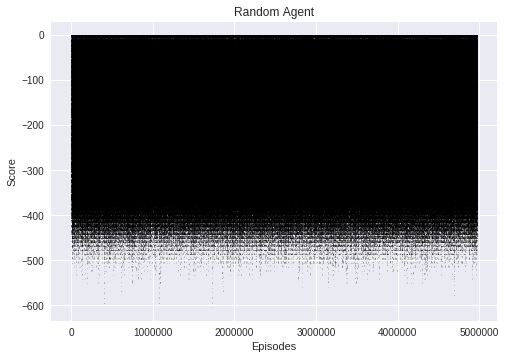

In [20]:
# Plot random agents
plt.plot(random_agent_scores, "ko", markersize=0.3)
plt.title("Random Agent")
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.show()

The random agent is behaving pretty consistent throughout all games. Most of the games ended up with a score between around -300 and -500, although in some of them the agent played nearly perfectly around the 0 score region. But these games are pretty rare and the score-scale would have likely extended downwards as we have limited the moves of our agent.



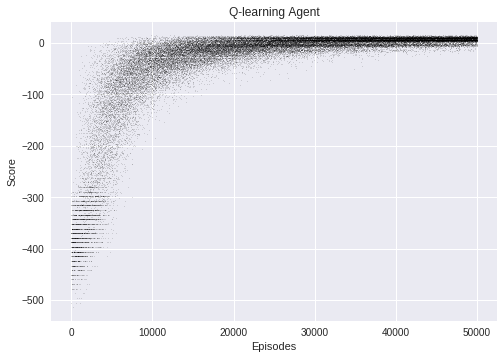

In [21]:
# Plot Q-learning agents
plt.plot(q_agent_scores, "ko", markersize=0.3)
plt.title("Q-learning Agent")
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.show()

Q-learning agent’s performance looks a lot better. The first 3000 games are similar to the random agent. But after that the average performance goes up pretty rapidly. At 20000 games the performance converges. Still there are some games that end up with up to -100, because at that point we have an exploration rate of about 25%.

## Solving Taxi-v2 Problem on OpenAI GYM using crossentropy method

In this notebook we solve a reinforcement learning problem with crossentropy method.

“There are 4 locations (labelled by different letters), and our job is to pick up the passenger at one location and drop him off at another. We receive +20 points for a successful drop-off and lose 1 point for every time-step it takes. There is also a 10 point penalty for illegal pick-up and drop-off actions.”

### Additional resources:
- https://github.com/y2ee201/Coursera-Practical-RL-NRUSHE
- https://github.com/BoYanSTKO/Practical_RL-coursera

In [2]:
import gym
import numpy as np
import pandas as pd

In [23]:
from IPython.display import clear_output

In [3]:
env = gym.make("Taxi-v2")

In [4]:
env.reset()
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [5]:
n_states  = env.observation_space.n
n_actions = env.action_space.n

print("n_states=%i, n_actions=%i"%(n_states, n_actions))

n_states=500, n_actions=6


### Create a stochastic policy

Our policy will be a probability distribution 

$\rm policy[s,a] = P(take\;action\;a\;|\;in\;state\;s)$

Since we still use integer state and action representation, we use a 2-dimensional array to represent the policy. We initialize policy "uniformly", that is, probabilities of all action will be equal. 

In [7]:
#policy = <your code here! Create an array to store action probabilities>
policy = np.ones((n_states, n_actions))/n_actions

In [8]:
assert type(policy) in (np.ndarray,np.matrix)
assert np.allclose(policy,1./n_actions)
assert np.allclose(np.sum(policy,axis=1), 1)

## Play the game

We also record all states and actions we took.

In [9]:
def generate_session(policy,t_max=10**4):
    """
    Play game until end or for t_max ticks.
    :param policy: an array of shape [n_states,n_actions] with action probabilities
    :returns: list of states, list of actions and sum of rewards
    """
    states,actions = [],[]
    total_reward = 0.
    
    s = env.reset()
    
    for t in range(t_max):
        
        #a = <sample action from policy (hint: use np.random.choice)>
        a = np.random.choice(n_actions, size=1, p=policy[s])[0]
        
        new_s, r, done, info = env.step(a)
        
        # Record state, action and add up reward to states,actions and total_reward accordingly. 
        states.append(s)
        actions.append(a)
        total_reward += r
        
        s = new_s
        if done:
            break
    return states, actions, total_reward

In [10]:
s,a,r = generate_session(policy)
assert type(s) == type(a) == list
assert len(s) == len(a)
assert type(r) in [float,np.float]

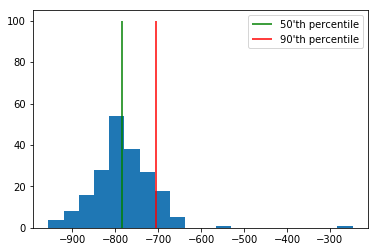

In [11]:
# Let's see the initial reward distribution
import matplotlib.pyplot as plt
%matplotlib inline

sample_rewards = [generate_session(policy,t_max=1000)[-1] for _ in range(200)]

plt.hist(sample_rewards,bins=20);
plt.vlines([np.percentile(sample_rewards, 50)], [0], [100], label="50'th percentile", color='green')
plt.vlines([np.percentile(sample_rewards, 90)], [0], [100], label="90'th percentile", color='red')
plt.legend()

### Crossentropy method steps 

In [12]:
def select_elites(states_batch,actions_batch,rewards_batch,percentile=50):
    """
    Select states and actions from games that have rewards >= percentile
    :param states_batch: list of lists of states, states_batch[session_i][t]
    :param actions_batch: list of lists of actions, actions_batch[session_i][t]
    :param rewards_batch: list of rewards, rewards_batch[session_i][t]
    
    :returns: elite_states,elite_actions, both 1D lists of states and respective actions from elite sessions
    
    Please return elite states and actions in their original order 
    [i.e. sorted by session number and timestep within session]
    
    If you're confused, see examples below. Please don't assume that states are integers (they'll get different later).
    """
    
    #reward_threshold = <Compute minimum reward for elite sessions. Hint: use np.percentile>
    reward_threshold = np.percentile(rewards_batch, percentile)
    
    #elite_states  = <your code here>
    # Version 1.
    elite_states  = [s for i in range(len(states_batch)) if rewards_batch[i]>=reward_threshold \
                     for s in states_batch[i]]
    
    #elite_actions = <your code here>
    elite_actions = [a for i in range(len(actions_batch)) if rewards_batch[i]>=reward_threshold \
                     for a in actions_batch[i]]
    
    # Version 2.
    #elite_states  = [states_batch[i] for i in np.where(rewards_batch>=reward_threshold)[0]]
    #elite_states = [item for sublist in elite_states for item in sublist]
    #elite_actions = [actions_batch[i] for i in np.where(rewards_batch>=reward_threshold)[0]]
    #elite_actions = [item for sublist in elite_actions for item in sublist]
    
    # Version 3.
    #from itertools import chain
    #elite_states  = list(chain(*[state for state,_ in zip(states_batch,rewards_batch) if _ >= reward_threshold]))
    #elite_actions = list(chain(*[state for state,_ in zip(actions_batch,rewards_batch) if _ >=reward_threshold]))
    
    # Version 4.
    #elite_states = []
    #elite_actions = []
    #for i in range(len(rewards_batch)):
    #    reward = rewards_batch[i]
    #    if reward>=reward_threshold:
    #        for state_element, action_element in zip(states_batch[i], actions_batch[i]):
    #            elite_states.append(state_element)
    #            elite_actions.append(action_element)
    
    # Version 5.
    #elite_states  = [state for i in range(len(rewards_batch))   if rewards_batch[i]>= reward_threshold for state in states_batch[i] ]
    #elite_actions = [action for i in range(len(rewards_batch))  if rewards_batch[i] >= reward_threshold for action in actions_batch[i]]
    
    return elite_states,elite_actions

In [13]:
states_batch = [
    [1,2,3],   #game1
    [4,2,0,2], #game2
    [3,1]      #game3
]

actions_batch = [
    [0,2,4],   #game1
    [3,2,0,1], #game2
    [3,3]      #game3
]
rewards_batch = [
    3,         #game1
    4,         #game2
    5,         #game3
]

test_result_0   = select_elites(states_batch, actions_batch, rewards_batch, percentile=0)
test_result_40  = select_elites(states_batch, actions_batch, rewards_batch, percentile=30)
test_result_90  = select_elites(states_batch, actions_batch, rewards_batch, percentile=90)
test_result_100 = select_elites(states_batch, actions_batch, rewards_batch, percentile=100)

assert np.all(test_result_0[0] == [1, 2, 3, 4, 2, 0, 2, 3, 1])  \
   and np.all(test_result_0[1] == [0, 2, 4, 3, 2, 0, 1, 3, 3]),\
        "For percentile 0 you should return all states and actions in chronological order"
assert np.all(test_result_40[0] == [4, 2, 0, 2, 3, 1]) and \
        np.all(test_result_40[1] ==[3, 2, 0, 1, 3, 3]),\
        "For percentile 30 you should only select states/actions from two first"
assert np.all(test_result_90[0] == [3,1]) and \
        np.all(test_result_90[1] == [3,3]),\
        "For percentile 90 you should only select states/actions from one game"
assert np.all(test_result_100[0] == [3,1]) and\
       np.all(test_result_100[1] == [3,3]),\
        "Please make sure you use >=, not >. Also double-check how you compute percentile."
print("Ok!")

Ok!


In [16]:
from collections import defaultdict

def update_policy(elite_states,elite_actions):
    """
    Given old policy and a list of elite states/actions from select_elites,
    return new updated policy where each action probability is proportional to
    
    policy[s_i,a_i] ~ #[occurences of si and ai in elite states/actions]
    
    Don't forget to normalize policy to get valid probabilities and handle 0/0 case.
    In case you never visited a state, set probabilities for all actions to 1./n_actions
    
    :param elite_states: 1D list of states from elite sessions
    :param elite_actions: 1D list of actions from elite sessions
    
    """
    
    new_policy = np.zeros([n_states,n_actions])
    
    #Don't forget to set 1/n_actions for all actions in unvisited states.
    #<Your code here: update probabilities for actions given elite states & actions>
    # Version 1.
    state_action_dict = defaultdict(lambda: [0]*n_actions)
    
    for i in range(len(elite_states)):
        state_action_dict[elite_states[i]][elite_actions[i]]+=1

    for i in range(n_states):
        if i not in state_action_dict:
            new_policy[i] = [1/n_actions]*n_actions
        else:
            new_policy[i] = [p/sum(state_action_dict[i]) for p in state_action_dict[i]]
    
    # Version 2.
    #for i,j in list(zip(elite_states, elite_actions)):
    #    new_policy[i,j] = new_policy[i,j] + 1
    
    #row_sums = new_policy.sum(axis=1)
    #new_policy = new_policy / row_sums[:, np.newaxis]
    #new_policy[np.isnan(new_policy)]=1/n_actions
    
    # Version 3.
    #for s,a in zip(elite_states,elite_actions):
    #    new_policy[s,a] += 1.0
    #for r_id in [r for r in range(new_policy.shape[0]) if r not in elite_states]:
    #    new_policy[r_id].fill(1. /n_actions)
    
    # Normalise
    #new_policy = new_policy/new_policy.sum(axis = 1,keepdims=1 )
    
    # Version 4.
    #visit_states = defaultdict(int)
    #default_list = lambda : [0]*n_actions
    #state_action_dict = defaultdict(default_list)
    #new_policy = np.zeros([n_states,n_actions])
    
    #for state, action in zip(elite_states, elite_actions):
    #    visit_states[state]+=1
    #    state_action_dict[state][action]+=1
    
    #for i in range (n_states):
    #    for j in range (n_actions):
    #        if visit_states[i]:
    #            new_policy[i][j] = state_action_dict[i][j]/visit_states[i]
    #        else : 
    #            new_policy[i][j] = 1/n_actions
    
    # Version 5.
    #for s,a in zip(elite_states,elite_actions):
    #    new_policy[s][a] += 1
    #default_p = 1/n_actions
    #for i in range(new_policy.shape[0]):
    #    sa_sum  = new_policy[i].sum()
    #    if sa_sum == 0:
    #        new_policy[i] = np.ones(n_actions) * default_p
    #    else:      
    #        for j  in range(new_policy.shape[1]):
    #            if new_policy[i][j] > 0:
    #                new_policy[i][j]/= sa_sum
    
    return new_policy

In [17]:
elite_states, elite_actions = ([1, 2, 3, 4, 2, 0, 2, 3, 1], [0, 2, 4, 3, 2, 0, 1, 3, 3])


new_policy = update_policy(elite_states,elite_actions)

assert np.isfinite(new_policy).all(), "Your new policy contains NaNs or +-inf. Make sure you don't divide by zero."
assert np.all(new_policy>=0), "Your new policy can't have negative action probabilities"
assert np.allclose(new_policy.sum(axis=-1),1), "Your new policy should be a valid probability distribution over actions"
reference_answer = np.array([
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.5       ,  0.        ,  0.        ,  0.5       ,  0.        ],
       [ 0.        ,  0.33333333,  0.66666667,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.5       ,  0.5       ]])
assert np.allclose(new_policy[:4,:5],reference_answer)
print("Ok!")

Ok!


In [18]:
def show_progress(batch_rewards, log, percentile, reward_range=[-990,+10]):
    """
    A convenience function that displays training progress. 
    No cool math here, just charts.
    """
    
    mean_reward, threshold = np.mean(batch_rewards), np.percentile(batch_rewards, percentile)
    log.append([mean_reward,threshold])

    clear_output(True)
    print("mean reward = %.3f, threshold=%.3f"%(mean_reward, threshold))
    plt.figure(figsize=[8,4])
    plt.subplot(1,2,1)
    plt.plot(list(zip(*log))[0], label='Mean rewards')
    plt.plot(list(zip(*log))[1], label='Reward thresholds')
    plt.legend()
    plt.grid()
    
    plt.subplot(1,2,2)
    plt.hist(batch_rewards,range=reward_range);
    plt.vlines([np.percentile(batch_rewards, percentile)], [0], [100], label="percentile", color='red')
    plt.legend()
    plt.grid()

    return plt.show()

In [19]:
# reset policy just in case
policy = np.ones([n_states, n_actions]) / n_actions 

In [20]:
n_sessions = 250  #sample this many sessions
percentile = 50  #take this percent of session with highest rewards
learning_rate = 0.5  #add this thing to all counts for stability

mean reward = -202.212, threshold=-0.500


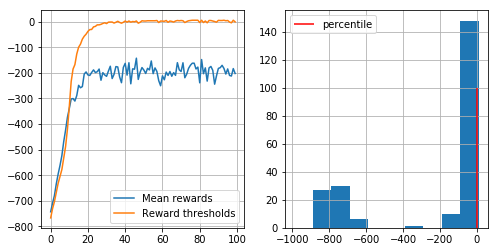

In [24]:
log = []

for i in range(100):
    
    #%time sessions = [<generate a list of n_sessions new sessions>]
    %time sessions = [generate_session(policy) for _ in range(n_sessions)]
    
    batch_states,batch_actions,batch_rewards = zip(*sessions)

    #elite_states, elite_actions = <select elite states/actions>
    elite_states, elite_actions = select_elites(batch_states, 
                                                batch_actions, 
                                                batch_rewards, 
                                                percentile=percentile)
    
    #new_policy = <compute new policy>
    new_policy = update_policy(elite_states ,elite_actions)
    
    policy = learning_rate * new_policy + (1-learning_rate) * policy
    
    # display results on chart
    show_progress(batch_rewards, log, percentile)

### Reflecting on results

You may have noticed that the taxi problem quickly converges from <-1000 to a near-optimal score and then descends back into -50/-100. This is in part because the environment has some innate randomness. Namely, the starting points of passenger/driver change from episode to episode.

In case cross-entropy method (CEM) failed to learn how to win from one distinct starting point, it will simply discard it because no sessions from that starting point will make it into the "elites".

To mitigate that problem, you can either reduce the threshold for elite sessions (duct tape way) or change the way you evaluate strategy (theoretically correct way). You can first sample an action for every possible state and then evaluate this choice of actions by running several games and averaging rewards.

In [ ]:
# Submit to coursera¶
from submit import submit_taxi
submit_taxi(generate_session, policy, 'email', 'token')

In [ ]:
env.close()

# Sarsa, Expected sarsa and Q-learning on the OpenAI taxi environment

According to $\bf{Sarsa}$, once the agent gets to s’, it will follow its policy, π. Knowing this information, we can sample an action a’ from π at state s’, and use q(s’, a’) as the estimate of the next state:

q(s,a)=q(s,a)+α[Rt+1+γq(s′,a′)−q(s,a)]


$\bf{Expected\;Sarsa}$, on the other hand, reasons that rather than sampling from π to pick an action a’ by, we should just calculate the expected value of s’. This way, the estimate of how good s’ is won’t fluctuate around, like it would when sampling an action from a distribution, but rather remain steady around the “average” outcome for the state.

q(s,a)=q(s,a)+α[Rt+1+γ∑a′π(a′|s′)q(s′,a′)−q(s,a)]

$\bf{Q-learning}$ takes a different approach. It assumes that when the agent is in state s’, it will take the action a’ that it thinks is the best action. In other words, it will take the action a’ that maximises q(s’, a’).

q(s,a)=q(s,a)+α[Rt+1+γmaxa′q(s′,a′)−q(s,a)]

In [4]:
import gym 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

# For animation 
from IPython.display import clear_output
from time import sleep

In [11]:
class Agent: 
    def __init__(self, method, start_alpha = 0.3, start_gamma = 0.9, start_epsilon = 0.5):
        """method: one of 'q_learning', 'sarsa' or 'expected_sarsa' """
        self.method = method
        self.env = gym.make('Taxi-v3')
        self.n_squares = 25 
        self.n_passenger_locs = 5 
        self.n_dropoffs = 4 
        self.n_actions = self.env.action_space.n
        self.epsilon = start_epsilon
        self.gamma = start_gamma #  the discount factor for future rewards, towards the end of the episode once we don’t have many time steps left.
        self.alpha = start_alpha
        
        # Set up initial q-table 
        self.q = np.zeros(shape = (self.n_squares*self.n_passenger_locs*self.n_dropoffs, self.env.action_space.n))
        
        # Set up policy pi, init as equiprobable random policy
        self.pi = np.zeros_like(self.q)
        
        for i in range(self.pi.shape[0]): 
            for a in range(self.n_actions): 
                self.pi[i,a] = 1/self.n_actions

    def simulate_episode(self):  # runs an episode of the environment placing the car in a random position and randomising the passenger/dropoff locations
        s = self.env.reset() # used to start a new episode
        done = False
        r_sum = 0 # holds a running reward sum from the episode
        n_steps = 0 # used to track when we are getting close to the end of the episode
        gam = self.gamma
        
        while not done: 
            n_steps += 1
            # take action from policy
            x = np.random.random()
            a = np.argmax(np.cumsum(self.pi[s,:]) > x) #  sample an action from our policy
            # take step 
            s_prime,r,done,info = self.env.step(a)  
            
            if self.method == 'q_learning': 
                a_prime = np.random.choice(np.where(self.q[s_prime] == max(self.q[s_prime]))[0])
                self.q[s,a] = self.q[s,a] + self.alpha * \
                    (r + gam*self.q[s_prime,a_prime] - self.q[s,a])
            elif self.method == 'sarsa': 
                a_prime = np.argmax(np.cumsum(self.pi[s_prime,:]) > np.random.random())
                self.q[s,a] = self.q[s,a] + self.alpha * \
                    (r + gam*self.q[s_prime,a_prime ] - self.q[s,a])
            elif self.method == 'expected_sarsa':
                self.q[s,a] = self.q[s,a] + self.alpha * \
                    (r + gam* np.dot(self.pi[s_prime,:],self.q[s_prime,:]) - self.q[s,a])
            else: 
                raise Exception("Invalid method provided")
        
            # update policy
            best_a = np.random.choice(np.where(self.q[s] == max(self.q[s]))[0])
            for i in range(self.n_actions): # First we find what the best action is for our current state
                if i == best_a:      
                    self.pi[s,i] = 1 - (self.n_actions-1) * (self.epsilon / self.n_actions)
                else:                
                    self.pi[s,i] = self.epsilon / self.n_actions

            # decay gamma close to the end of the episode
            if n_steps > 185: 
                gam *= 0.875
            s = s_prime
            r_sum += r
            
        return r_sum

In [12]:
def train_agent(agent, n_episodes= 200001, epsilon_decay = 0.99995, alpha_decay = 0.99995, print_trace = False):
    r_sums = []
    for ep in range(n_episodes): 
        r_sum = agent.simulate_episode()
        # decrease epsilon and learning rate 
        agent.epsilon *= epsilon_decay
        agent.alpha *= alpha_decay
        if print_trace: 
            if ep % 20000 == 0 and ep > 0 : 
                print("Episode:", ep, "alpha:", np.round(agent.alpha, 3), "epsilon:",  np.round(agent.epsilon, 3))
                print ("Last 100 episodes avg reward: ", np.mean(r_sums[ep-100:ep]))
        r_sums.append(r_sum)
    return r_sums

Now we can create our agents and train them.

In [13]:
# Create agents 
sarsa_agent      = Agent(method='sarsa')
e_sarsa_agent    = Agent(method='expected_sarsa')
q_learning_agent = Agent(method='q_learning')

In [14]:
# Train agents
r_sums_sarsa      = train_agent(sarsa_agent, print_trace=True)
r_sums_e_sarsa    = train_agent(e_sarsa_agent, print_trace=True)
r_sums_q_learning = train_agent(q_learning_agent, print_trace=True)

Episode: 20000 alpha: 0.11 epsilon: 0.184
Last 100 episodes avg reward:  -3.81
Episode: 40000 alpha: 0.041 epsilon: 0.068
Last 100 episodes avg reward:  4.37
Episode: 60000 alpha: 0.015 epsilon: 0.025
Last 100 episodes avg reward:  7.27
Episode: 80000 alpha: 0.005 epsilon: 0.009
Last 100 episodes avg reward:  7.97
Episode: 100000 alpha: 0.002 epsilon: 0.003
Last 100 episodes avg reward:  7.45
Episode: 120000 alpha: 0.001 epsilon: 0.001
Last 100 episodes avg reward:  8.47
Episode: 140000 alpha: 0.0 epsilon: 0.0
Last 100 episodes avg reward:  8.15
Episode: 160000 alpha: 0.0 epsilon: 0.0
Last 100 episodes avg reward:  8.11
Episode: 180000 alpha: 0.0 epsilon: 0.0
Last 100 episodes avg reward:  7.97
Episode: 200000 alpha: 0.0 epsilon: 0.0
Last 100 episodes avg reward:  8.31
Episode: 20000 alpha: 0.11 epsilon: 0.184
Last 100 episodes avg reward:  -4.45
Episode: 40000 alpha: 0.041 epsilon: 0.068
Last 100 episodes avg reward:  5.17
Episode: 60000 alpha: 0.015 epsilon: 0.025
Last 100 episodes a

Which method is best?

After training our agents we can compare their performance to each other. The criteria for comparison we’ll use is the best 100-epsiode average reward for each agent

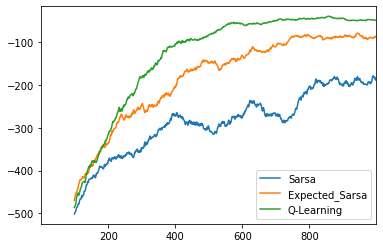

In [15]:
# Let’s plot the 100-epsiode rolling cumulative reward over time
df = pd.DataFrame({"Sarsa": r_sums_sarsa, 
             "Expected_Sarsa": r_sums_e_sarsa, 
             "Q-Learning": r_sums_q_learning})
df_ma = df.rolling(100, min_periods = 100).mean()
df_ma.iloc[1:1000].plot()

The green line (sarsa) seems to be below the others fairly consistently, but it’s close. Looks like the Sarsa agent tends to train slower than the other two, but not by a whole lot. At the end of 200000 episodes, however, it’s Expected Sarsa that’s delivered the best reward.

In [16]:
np.max(df_ma)

Sarsa             9.12
Expected_Sarsa    8.86
Q-Learning        8.88
dtype: float64

The best 100-episode streak gave this average return. Expected Sarsa comes out on top, but all three agents are close.

### Viewing the policy
We can try to understand the difference between agents. Even if one agent does better than the other two, it isn’t straightforward to see the reasons why. Visualising the policy is one way to find out. We can render the environment and to see how the agent behaves.

In [28]:
def generate_frames(agent, start_state):
    agent.env.reset()
    agent.env.env.s = start_state
    s = start_state
    policy = np.argmax(agent.pi,axis =1)
    epochs = 0
    penalties, reward = 0, 0
    frames = [] 
    done = False
    frames.append({
        'frame': agent.env.render(mode='ansi'),
        'state': agent.env.env.s ,
        'action': "Start",
        'reward': 0
        }
    )
    while not done:
        a = policy[s]
        s, reward, done, info = agent.env.step(a)
        if reward == -10:
            penalties += 1

        # Put each rendered frame into dict for animation
        frames.append({
            'frame': agent.env.render(mode='ansi'),
            'state': s,
            'action': a,
            'reward': reward
            }
        )
        epochs += 1
    print("Timesteps taken: {}".format(epochs))
    print("Penalties incurred: {}".format(penalties))
    return frames

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        #print(frame['frame'].getvalue())
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.4)

#### Expected Sarsa

In [32]:
agent = e_sarsa_agent
start_state = 315
frames = generate_frames(agent, start_state)
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Timestep: 201
State: 415
Action: 0
Reward: -1


#### Sarsa

In [34]:
agent = sarsa_agent
start_state = 315
frames = generate_frames(agent, start_state)
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Timestep: 201
State: 415
Action: 0
Reward: -1


#### Q-learning

In [35]:
agent = q_learning_agent
start_state = 315
frames = generate_frames(agent, start_state)
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Timestep: 201
State: 415
Action: 0
Reward: -1


Below we demonstrate some differences in policy between the expected sarsa agent and the sarsa agent. While the expected sarsa agent has learned the optimal policy, the sarsa agent hasn’t yet - but it’s not far off. (Note: these policies are before the agent is fully trained (after around 15000 episodes)).

### Conclusion
The three agents seemed to perform around the same on this task, with Sarsa being a little worse than the other two.

Source: https://tomroth.com.au/sarsa-qlearning/